In [1]:
import pprint
import json
import pathlib
import pandas as pdWW
import os
import importlib

In [2]:
from lib.helpers import *
# importlib.reload(helpers)
pp = pprint.PrettyPrinter(indent=4)

In [3]:
dirty_hourly = pathlib.Path('../../../data/dirty/hourly/')
jsonl_files = os.listdir(dirty_hourly)

In [4]:
print(jsonl_files[0])

twitter_61.jsonl


# Part 1: Parse/Extract fields from a single Day

In [5]:
tweets = filter_tweet_fields_as_dict(pathlib.Path(dirty_hourly,jsonl_files[0]))

print first element 

In [6]:
# pp.pprint(tweets[0:10])

In [7]:
df = pd.DataFrame(tweets)
df.head()

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,user_id,rt_status_screen_name,rt_status_id,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count
0,Tue Oct 29 11:58:59 +0000 2019,luisgfagundes,RT @CCNMarkets: Starbucks Will Accept Bitcoin ...,1189149629977452544,en,4301,177,461,"Jacksonville Beach, FL",http://pbs.twimg.com/profile_images/9022587817...,223997669,CCNMarkets,1856523530,[CCNMarkets],[1856523530],NaN,NaN,NaN
1,Tue Oct 29 11:58:59 +0000 2019,thefinancialfor,"RT @thefinancialfor: Every year since 2015, #B...",1189149627469193216,en,199,1501,6,"Amsterdam, Holanda",http://pbs.twimg.com/profile_images/1045031709...,2557010554,thefinancialfor,2557010554,[thefinancialfor],[2557010554],NaN,NaN,NaN
2,Tue Oct 29 11:58:57 +0000 2019,opp4wealth,RT @RedditBTC: This perfectly explains the cur...,1189149619713957888,en,2559,5846,6399,Lima / Peru,http://pbs.twimg.com/profile_images/1173000042...,30882319,RedditBTC,951006367,[RedditBTC],[951006367],NaN,NaN,NaN
3,Tue Oct 29 11:58:56 +0000 2019,Techtelegraph4,Russian Metals Plant to Start Bitcoin Mining h...,1189149616459190272,en,2,72,6,None,http://pbs.twimg.com/profile_images/1183377561...,1183377297400881152,NaN,NaN,[],[],NaN,NaN,NaN
4,Tue Oct 29 11:58:52 +0000 2019,tiago60334177,RT @BitcollarDApp: 3 days to go in IEO phase o...,1189149599581265920,en,236,28,355,None,http://pbs.twimg.com/profile_images/1108826758...,1108817796920688640,BitcollarDApp,1140825020463104000,[BitcollarDApp],[1140825020463104000],NaN,NaN,NaN


In [8]:
df[df['full_text'].str.contains('crypto')]

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,user_id,rt_status_screen_name,rt_status_id,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count
9,Tue Oct 29 11:58:41 +0000 2019,AvyLorenCohen,There are 3 million #Bitcoins left. Why does t...,1189149554370842629,en,199,4101,2802,Canada,http://pbs.twimg.com/profile_images/8094019953...,309295250,NaN,NaN,[],[],NaN,NaN,NaN
10,Tue Oct 29 11:58:41 +0000 2019,onerazz,South Korea adopts blockchain in 2020. Governm...,1189149553779494915,en,219,2084,2678,Global,http://pbs.twimg.com/profile_images/8412166458...,3145585729,NaN,NaN,[],[],NaN,NaN,NaN
11,Tue Oct 29 11:58:41 +0000 2019,jerayawara,South Korea adopts blockchain in 2020. Governm...,1189149551246090240,en,397,4566,4922,Global,http://pbs.twimg.com/profile_images/1176333594...,62054489,NaN,NaN,[],[],NaN,NaN,NaN
20,Tue Oct 29 11:58:14 +0000 2019,Alexeycrypto,"RT @Fisher85M: Why can't you cheat #bitcoin, @...",1189149440856219649,en,379,34,151,None,http://abs.twimg.com/sticky/default_profile_im...,900349179989544960,Fisher85M,846014785246367745,"[Fisher85M, JacBurns_Comext]","[846014785246367745, 2696578399]",NaN,NaN,NaN
27,Tue Oct 29 11:58:04 +0000 2019,coinsferaglobal,Starbucks Will Accept Bitcoin In 2020 Through ...,1189149399655571456,en,16,1470,63,Istanbul / Turkey,http://pbs.twimg.com/profile_images/1150826626...,1150737733683470338,NaN,NaN,[],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Tue Oct 29 11:43:54 +0000 2019,Investmentbitc1,That will save China the leading role in Block...,1189145833117233152,en,255,788,1118,"Munich, Germany",http://pbs.twimg.com/profile_images/1160478210...,1160464687710056448,NaN,NaN,[],[],106.0,283.0,1359.0
465,Tue Oct 29 11:43:54 +0000 2019,rickparimi,#China to remain rational amid #blockchain hyp...,1189145831229841408,fr,57,65,127,"Cream Ridge, New Jersey",http://pbs.twimg.com/profile_images/6743518006...,60758445,NaN,NaN,[],[],NaN,NaN,NaN
487,Tue Oct 29 11:43:27 +0000 2019,keeskroos,RT @JoshuaHReason: Domains are like #cryptocur...,1189145720135270407,en,648,354,332,"Den Haag, Nederland",http://pbs.twimg.com/profile_images/1152991752...,2493873834,JoshuaHReason,3068694925,[JoshuaHReason],[3068694925],NaN,NaN,NaN
488,Tue Oct 29 11:43:26 +0000 2019,republicadozap,RT @cryptosUSD: 🔄 Prices update in $USD (1 hou...,1189145717060886528,en,28588,593,4999,Localiza ai Trouxa,http://pbs.twimg.com/profile_images/1194301809...,1092885875351080967,cryptosUSD,1024959511071797248,[cryptosUSD],[1024959511071797248],NaN,NaN,NaN


In [9]:
df[df['full_text'].str.contains('BTC')]

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,user_id,rt_status_screen_name,rt_status_id,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count
2,Tue Oct 29 11:58:57 +0000 2019,opp4wealth,RT @RedditBTC: This perfectly explains the cur...,1189149619713957888,en,2559,5846,6399,Lima / Peru,http://pbs.twimg.com/profile_images/1173000042...,30882319,RedditBTC,951006367,[RedditBTC],[951006367],NaN,NaN,NaN
6,Tue Oct 29 11:58:46 +0000 2019,Vindyne8,RT @BTCTN: Why Central Banks Are Not Designed ...,1189149572259553281,en,70416,19783,17327,Earth,http://pbs.twimg.com/profile_images/1046512074...,2309346044,BTCTN,3367334171,[BTCTN],[3367334171],NaN,NaN,NaN
17,Tue Oct 29 11:58:19 +0000 2019,suminch3977,"RT @whale_alert: 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 43,653 #...",1189149460934213632,en,15,34,336,None,http://pbs.twimg.com/profile_images/1012764111...,956113329289744384,whale_alert,1039833297751302144,[whale_alert],[1039833297751302144],NaN,NaN,NaN
19,Tue Oct 29 11:58:17 +0000 2019,cokebyparis,RT @bitcoinzay: If i thought i was too poor wh...,1189149453539782658,en,8331,189,336,"Philadelphia, PA",http://pbs.twimg.com/profile_images/1111647987...,882758981902639104,bitcoinzay,54307047,[bitcoinzay],[54307047],NaN,NaN,NaN
28,Tue Oct 29 11:58:03 +0000 2019,Crypto24842130,@HuobiWallet $Bitcoin is the future\n\n#WeLoveBTC,1189149395536764928,en,626,206,525,None,http://pbs.twimg.com/profile_images/1194435143...,1184281465355407360,NaN,NaN,[HuobiWallet],[999509989239615489],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Tue Oct 29 11:43:26 +0000 2019,republicadozap,RT @cryptosUSD: 🔄 Prices update in $USD (1 hou...,1189145717060886528,en,28588,593,4999,Localiza ai Trouxa,http://pbs.twimg.com/profile_images/1194301809...,1092885875351080967,cryptosUSD,1024959511071797248,[cryptosUSD],[1024959511071797248],NaN,NaN,NaN
491,Tue Oct 29 11:43:20 +0000 2019,xbtmoney,"Governments Won’t Control Bitcoin, Hodlers ‘Wi...",1189145692108939265,en,490,11170,558,XBT (BTC) News Aggregator,http://pbs.twimg.com/profile_images/5989030800...,199453782,NaN,NaN,[],[],NaN,NaN,NaN
492,Tue Oct 29 11:43:18 +0000 2019,Crisle33,RT @XevenueExchange: Weekly Revenue Sharing Re...,1189145682919092224,en,12753,1719,3376,"Lungsod ng Tarlac, Rehiyon ng",http://pbs.twimg.com/profile_images/1176521553...,4609318578,XevenueExchange,1020237647074209792,[XevenueExchange],[1020237647074209792],NaN,NaN,NaN
495,Tue Oct 29 11:43:12 +0000 2019,TommyBrownIII1,RT @CoinTradingBot: Top 100 avg 24h return: 0....,1189145654939000835,en,3099,281,155,None,http://pbs.twimg.com/profile_images/1191317703...,976571187487825927,CoinTradingBot,904014303975571457,"[CoinTradingBot, Bytecoin_BCN]","[904014303975571457, 2510084300]",NaN,NaN,NaN


In [10]:
df[df['full_text'].str.contains('ETH')]

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,user_id,rt_status_screen_name,rt_status_id,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count
42,Tue Oct 29 11:57:43 +0000 2019,Steveekicks,RT @rektcapital: $ETH $ETHBTC #ethereum \n\nPl...,1189149308697923584,en,19553,636,124,Miami Gardens,http://pbs.twimg.com/profile_images/1132506370...,368612715,rektcapital,918122676195090433,[rektcapital],[918122676195090433],NaN,NaN,NaN
209,Tue Oct 29 11:51:51 +0000 2019,CryptonewsCom,🔥Today's top #Cryptonews: \n\n- #Samsung integ...,1189147835377340416,en,1545,3337,14,None,http://pbs.twimg.com/profile_images/9843806001...,940960926890647553,NaN,NaN,[PaxosGlobal],[3389763521],NaN,NaN,NaN
343,Tue Oct 29 11:47:29 +0000 2019,frankydoodle01,@_thebamboo_io #thebamboo #ICO #Crowdsale #Bit...,1189146735760666625,en,3777,1336,4865,None,http://pbs.twimg.com/profile_images/1135873316...,2365684808,NaN,NaN,[_thebamboo_io],[1156176877511434240],NaN,NaN,NaN
353,Tue Oct 29 11:47:18 +0000 2019,frankydoodle01,#thebamboo #ICO #Crowdsale #Bitcoin #Blockchai...,1189146686691504128,en,3777,1336,4865,None,http://pbs.twimg.com/profile_images/1135873316...,2365684808,NaN,NaN,[],[],32.0,13.0,104.0
380,Tue Oct 29 11:46:34 +0000 2019,webnowcompany,#DTA #BTC #ETH It's weighted and based on bitc...,1189146504038178816,en,74,1986,1965,USA,http://pbs.twimg.com/profile_images/1127005759...,1052519189989269504,NaN,NaN,[],[],NaN,NaN,NaN
466,Tue Oct 29 11:43:53 +0000 2019,StefanDziu,RT @infinite27TS: 🆕LET US GROW TOGETHER!\n5000...,1189145828851703809,en,452,79,374,Mond,http://pbs.twimg.com/profile_images/9704308007...,2549735088,Crypto_infinite,959047369512796161,"[infinite27TS, MTradesatoshi, ModChicky_TS]","[None, 1183548205801172992, 1147678825062391808]",NaN,NaN,NaN
470,Tue Oct 29 11:43:45 +0000 2019,Harpree29747054,RT @CryptoTownEU: 🚀 Airdrop : Botz Token\n💰 Va...,1189145794454130688,en,202,15,303,None,http://pbs.twimg.com/profile_images/1143757125...,974628616955973632,CryptoTownEU,1034478294677250048,[CryptoTownEU],[1034478294677250048],NaN,NaN,NaN
488,Tue Oct 29 11:43:26 +0000 2019,republicadozap,RT @cryptosUSD: 🔄 Prices update in $USD (1 hou...,1189145717060886528,en,28588,593,4999,Localiza ai Trouxa,http://pbs.twimg.com/profile_images/1194301809...,1092885875351080967,cryptosUSD,1024959511071797248,[cryptosUSD],[1024959511071797248],NaN,NaN,NaN
495,Tue Oct 29 11:43:12 +0000 2019,TommyBrownIII1,RT @CoinTradingBot: Top 100 avg 24h return: 0....,1189145654939000835,en,3099,281,155,None,http://pbs.twimg.com/profile_images/1191317703...,976571187487825927,CoinTradingBot,904014303975571457,"[CoinTradingBot, Bytecoin_BCN]","[904014303975571457, 2510084300]",NaN,NaN,NaN
496,Tue Oct 29 11:43:12 +0000 2019,TommyBrownIII1,RT @CoinTradingBot: Top 100 avg 24h return: 0....,1189145654939000835,en,3099,281,155,None,http://pbs.twimg.com/profile_images/1191317703...,976571187487825927,CoinTradingBot,904014303975571457,"[CoinTradingBot, Bytecoin_BCN]","[904014303975571457, 2510084300]",NaN,NaN,NaN


# Part 2, Parse/Extract data for ALL (bigdaddy) Days

In [11]:
all_tweets = []

for file in jsonl_files:
    all_tweets.extend(filter_tweet_fields_as_dict(pathlib.Path(dirty_hourly,file)))

In [12]:
print(len(all_tweets))

204000


In [13]:
all_tweets_df = pd.DataFrame(all_tweets)

In [14]:
all_tweets_df.describe()

,id,user_favourites_count,user_followers_count,user_friends_count,user_id,quoted_quote_count,quoted_reply_count,quoted_retweet_count
count,2.040000e+05,2.040000e+05,2.040000e+05,204000.000000,2.040000e+05,12421.000000,12421.000000,12421.000000
mean,1.186981e+18,1.198763e+04,6.030132e+03,2338.735049,5.755950e+17,318.833588,637.422832,1191.190242
std,1.778519e+15,3.359382e+04,9.681044e+04,8945.693355,5.096184e+17,2598.010455,6653.674495,8505.617724
min,1.183905e+18,0.000000e+00,0.000000e+00,0.000000,1.200000e+01,1.000000,0.000000,0.000000
25%,1.185442e+18,1.630000e+02,9.300000e+01,151.000000,9.092315e+08,3.000000,4.000000,9.000000
50%,1.186982e+18,1.792000e+03,4.210000e+02,490.000000,8.574031e+17,10.000000,18.000000,53.000000
75%,1.188518e+18,9.395500e+03,1.821000e+03,1511.000000,1.047874e+18,55.000000,73.000000,255.000000
max,1.190056e+18,1.156485e+06,2.088005e+07,466478.000000,1.189962e+18,41058.000000,109446.000000,308702.000000


In [15]:
all_tweets_df.dtypes

created_at                 object
screen_name                object
full_text                  object
id                          int64
lang                       object
user_favourites_count       int64
user_followers_count        int64
user_friends_count          int64
user_location              object
user_profile_image_url     object
user_id                     int64
rt_status_screen_name      object
rt_status_id               object
mentions                   object
mention_ids                object
quoted_quote_count        float64
quoted_reply_count        float64
quoted_retweet_count      float64
dtype: object

In [16]:
all_tweets_df[all_tweets_df['full_text'].str.contains('BTC')]

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,user_id,rt_status_screen_name,rt_status_id,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count
2,Tue Oct 29 11:58:57 +0000 2019,opp4wealth,RT @RedditBTC: This perfectly explains the cur...,1189149619713957888,en,2559,5846,6399,Lima / Peru,http://pbs.twimg.com/profile_images/1173000042...,30882319,RedditBTC,951006367,[RedditBTC],[951006367],NaN,NaN,NaN
6,Tue Oct 29 11:58:46 +0000 2019,Vindyne8,RT @BTCTN: Why Central Banks Are Not Designed ...,1189149572259553281,en,70416,19783,17327,Earth,http://pbs.twimg.com/profile_images/1046512074...,2309346044,BTCTN,3367334171,[BTCTN],[3367334171],NaN,NaN,NaN
17,Tue Oct 29 11:58:19 +0000 2019,suminch3977,"RT @whale_alert: 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 43,653 #...",1189149460934213632,en,15,34,336,None,http://pbs.twimg.com/profile_images/1012764111...,956113329289744384,whale_alert,1039833297751302144,[whale_alert],[1039833297751302144],NaN,NaN,NaN
19,Tue Oct 29 11:58:17 +0000 2019,cokebyparis,RT @bitcoinzay: If i thought i was too poor wh...,1189149453539782658,en,8331,189,336,"Philadelphia, PA",http://pbs.twimg.com/profile_images/1111647987...,882758981902639104,bitcoinzay,54307047,[bitcoinzay],[54307047],NaN,NaN,NaN
28,Tue Oct 29 11:58:03 +0000 2019,Crypto24842130,@HuobiWallet $Bitcoin is the future\n\n#WeLoveBTC,1189149395536764928,en,626,206,525,None,http://pbs.twimg.com/profile_images/1194435143...,1184281465355407360,NaN,NaN,[HuobiWallet],[999509989239615489],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203913,Tue Oct 22 12:48:00 +0000 2019,SteCapo3,RT @Cointelegraph: Opera users can now send an...,1186625250282352641,en,5060,109,501,None,http://pbs.twimg.com/profile_images/1136576010...,1074055832936034307,Cointelegraph,2207129125,[Cointelegraph],[2207129125],NaN,NaN,NaN
203959,Tue Oct 22 12:46:55 +0000 2019,WarriorXrp,RT @Eviso7: Bitcoin $BTC The flattening 🥖 Stay...,1186624976624979968,en,3571,154,64,None,http://pbs.twimg.com/profile_images/1193948121...,1164074585383428096,Eviso7,1181863570830548994,[Eviso7],[1181863570830548994],NaN,NaN,NaN
203965,Tue Oct 22 12:46:40 +0000 2019,bitcoinagile,$#bitcoin Im Bullish Locally for COINBASE:BTC...,1186624913404256257,en,2774,51962,13124,Matter Doesn't Matter,http://pbs.twimg.com/profile_images/9026175311...,2281314234,NaN,NaN,[],[],NaN,NaN,NaN
203971,Tue Oct 22 12:46:33 +0000 2019,joyrom,RT @Cointelegraph: Opera users can now send an...,1186624883830280198,en,1051,103,758,Web,http://pbs.twimg.com/profile_images/915417577/...,48138000,Cointelegraph,2207129125,[Cointelegraph],[2207129125],NaN,NaN,NaN


In [17]:
all_tweets_df['screen_name'].nunique()

70319

# The BigDaddys

In [18]:
all_tweets_df.groupby(['screen_name']).count().sort_values(by="id", ascending=False)

,created_at,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,user_id,rt_status_screen_name,rt_status_id,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count
screen_name,,,,,,,,,,,,,,,,,
SportsbookBTC,1471,1471,1471,1471,1471,1471,1471,1471,1471,1471,2,2,1471,1471,0,0,0
News_1jl4,1349,1349,1349,1349,1349,1349,1349,1349,1349,1349,0,0,1349,1349,0,0,0
bitcoinincoins,1153,1153,1153,1153,1153,1153,1153,1153,1153,1153,0,0,1153,1153,0,0,0
1jl4com,980,980,980,980,980,980,980,980,980,980,0,0,980,980,0,0,0
MoneyMasterX,701,701,701,701,701,701,701,701,701,701,3,3,701,701,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMC58032931,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
TMGOX,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0
Claire93862769,1,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0


In [19]:
from lib.sentimentframe import *

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/will/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
tweet_sentiment_df = process_df(all_tweets_df, tokenize=True, sentiment=True)

In [21]:
display("HEAD")
display(tweet_sentiment_df.head())
display("TAIL")
display(tweet_sentiment_df.tail())

'HEAD'

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,...,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count,clean_tokens,compound,negative,neutral,positive
0,Tue Oct 29 11:58:59 +0000 2019,luisgfagundes,RT @CCNMarkets: Starbucks Will Accept Bitcoin ...,1189149629977452544,en,4301,177,461,"Jacksonville Beach, FL",http://pbs.twimg.com/profile_images/9022587817...,...,[CCNMarkets],[1856523530],NaN,NaN,NaN,"[rt, ccnmarkets, starbucks, accept, bitcoin, t...",0.0,0.593,0.407,0.6705
1,Tue Oct 29 11:58:59 +0000 2019,thefinancialfor,"RT @thefinancialfor: Every year since 2015, #B...",1189149627469193216,en,199,1501,6,"Amsterdam, Holanda",http://pbs.twimg.com/profile_images/1045031709...,...,[thefinancialfor],[2557010554],NaN,NaN,NaN,"[rt, thefinancialfor, every, year, since, bitc...",0.0,0.505,0.495,0.8316
2,Tue Oct 29 11:58:57 +0000 2019,opp4wealth,RT @RedditBTC: This perfectly explains the cur...,1189149619713957888,en,2559,5846,6399,Lima / Peru,http://pbs.twimg.com/profile_images/1173000042...,...,[RedditBTC],[951006367],NaN,NaN,NaN,"[rt, redditbtc, perfectly, explains, current, ...",0.0,0.756,0.244,0.6369
3,Tue Oct 29 11:58:56 +0000 2019,Techtelegraph4,Russian Metals Plant to Start Bitcoin Mining h...,1189149616459190272,en,2,72,6,None,http://pbs.twimg.com/profile_images/1183377561...,...,[],[],NaN,NaN,NaN,"[russian, metal, plant, start, bitcoinmining, ...",0.0,1.000,0.000,0.0000
4,Tue Oct 29 11:58:52 +0000 2019,tiago60334177,RT @BitcollarDApp: 3 days to go in IEO phase o...,1189149599581265920,en,236,28,355,None,http://pbs.twimg.com/profile_images/1108826758...,...,[BitcollarDApp],[1140825020463104000],NaN,NaN,NaN,"[rt, bitcollardapp, day, go, ieo, phase, one, ...",0.0,1.000,0.000,0.0000


'TAIL'

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,...,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count,clean_tokens,compound,negative,neutral,positive
203995,Tue Oct 22 12:45:45 +0000 2019,babobowitz,RT @JacobCanfield: Trying to talk to my friend...,1186624683241689091,en,435,20,104,None,http://pbs.twimg.com/profile_images/1181409067...,...,[JacobCanfield],[933567617549455360],NaN,NaN,NaN,"[rt, jacobcanfield, trying, talk, friend, fami...",0.0,0.789,0.211,0.4939
203996,Tue Oct 22 12:45:40 +0000 2019,emilyia,RT @NiederNoah: Hey guys!\nLet's do a little q...,1186624660705828864,en,1,0,7,None,http://pbs.twimg.com/profile_images/5759807636...,...,[NiederNoah],[834875272616947714],NaN,NaN,NaN,"[rt, niedernoah, hey, guyslets, little, quicky...",0.0,0.839,0.161,0.3612
203997,Tue Oct 22 12:45:35 +0000 2019,kamivvs2,RT @100trillionUSD: #bitcoin .. like clockwork...,1186624643043606534,en,2098,153,520,None,http://pbs.twimg.com/profile_images/1175010973...,...,[100trillionUSD],[918804624303382528],NaN,NaN,NaN,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.0,0.667,0.333,0.3612
203998,Tue Oct 22 12:45:35 +0000 2019,kamivvs2,RT @100trillionUSD: #bitcoin .. like clockwork...,1186624643043606534,en,2098,153,520,None,http://pbs.twimg.com/profile_images/1175010973...,...,[100trillionUSD],[918804624303382528],NaN,NaN,NaN,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.0,0.667,0.333,0.3612
203999,Tue Oct 22 12:45:35 +0000 2019,blockalertz,Bitcoin IRA Is Letting Customers Lend Out Thei...,1186624642955522048,en,8,139,33,None,http://pbs.twimg.com/profile_images/6986857750...,...,[],[],NaN,NaN,NaN,"[bitcoin, ira, letting, customer, lend, crypto...",0.0,1.000,0.000,0.0000


In [22]:
tweet_sentiment_df.drop_duplicates(inplace=True,subset=['id'])
tweet_sentiment_df.count()

created_at                203017
screen_name               203017
full_text                 203017
id                        203017
lang                      203017
user_favourites_count     203017
user_followers_count      203017
user_friends_count        203017
user_location             129361
user_profile_image_url    203017
user_id                   203017
rt_status_screen_name     102870
rt_status_id              102870
mentions                  203017
mention_ids               203017
quoted_quote_count         12361
quoted_reply_count         12361
quoted_retweet_count       12361
clean_tokens              203017
compound                  203017
negative                  203017
neutral                   203017
positive                  203017
dtype: int64

In [23]:
tweet_sentiment_df['created_at'] = pd.to_datetime(tweet_sentiment_df['created_at'])

In [24]:
df1 = tweet_sentiment_df.iloc[:100_000]
df2 = tweet_sentiment_df.iloc[100_000:]

df1.to_pickle("./twitter_sentiment1.pkl")
df2.to_pickle("./twitter_sentiment2.pkl")

In [25]:
df2.tail()

,created_at,screen_name,full_text,id,lang,user_favourites_count,user_followers_count,user_friends_count,user_location,user_profile_image_url,...,mentions,mention_ids,quoted_quote_count,quoted_reply_count,quoted_retweet_count,clean_tokens,compound,negative,neutral,positive
203994,2019-10-22 12:45:47+00:00,QuantNomad,Why seasonality in crypto markets is important...,1186624689474621441,en,5,389,24,Switzerland,http://pbs.twimg.com/profile_images/9555677720...,...,[],[],NaN,NaN,NaN,"[seasonality, crypto, market, important, theac...",0.0,0.795,0.205,0.2023
203995,2019-10-22 12:45:45+00:00,babobowitz,RT @JacobCanfield: Trying to talk to my friend...,1186624683241689091,en,435,20,104,None,http://pbs.twimg.com/profile_images/1181409067...,...,[JacobCanfield],[933567617549455360],NaN,NaN,NaN,"[rt, jacobcanfield, trying, talk, friend, fami...",0.0,0.789,0.211,0.4939
203996,2019-10-22 12:45:40+00:00,emilyia,RT @NiederNoah: Hey guys!\nLet's do a little q...,1186624660705828864,en,1,0,7,None,http://pbs.twimg.com/profile_images/5759807636...,...,[NiederNoah],[834875272616947714],NaN,NaN,NaN,"[rt, niedernoah, hey, guyslets, little, quicky...",0.0,0.839,0.161,0.3612
203997,2019-10-22 12:45:35+00:00,kamivvs2,RT @100trillionUSD: #bitcoin .. like clockwork...,1186624643043606534,en,2098,153,520,None,http://pbs.twimg.com/profile_images/1175010973...,...,[100trillionUSD],[918804624303382528],NaN,NaN,NaN,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.0,0.667,0.333,0.3612
203999,2019-10-22 12:45:35+00:00,blockalertz,Bitcoin IRA Is Letting Customers Lend Out Thei...,1186624642955522048,en,8,139,33,None,http://pbs.twimg.com/profile_images/6986857750...,...,[],[],NaN,NaN,NaN,"[bitcoin, ira, letting, customer, lend, crypto...",0.0,1.000,0.000,0.0000


# Additional Cleaning & Experimenting

In [57]:
unique_sentiment_df = process_df(all_tweets_df, tokenize=True, sentiment=True)

In [58]:
unique_sentiment_df['created_at'] = pd.to_datetime(unique_sentiment_df['created_at'])

In [59]:
unique_sentiment_df.drop_duplicates(inplace=True,subset=['id'])

In [60]:
unique_sentiment_df = unique_sentiment_df[['created_at','negative','neutral','positive']]

In [61]:
unique_sentiment_df.count()

created_at    203017
negative      203017
neutral       203017
positive      203017
dtype: int64

In [62]:
#unique_sentiment_df.dtypes

In [63]:
unique_sentiment_df.head()

,created_at,negative,neutral,positive
0,2019-10-29 11:58:59+00:00,0.593,0.407,0.6705
1,2019-10-29 11:58:59+00:00,0.505,0.495,0.8316
2,2019-10-29 11:58:57+00:00,0.756,0.244,0.6369
3,2019-10-29 11:58:56+00:00,1.000,0.000,0.0000
4,2019-10-29 11:58:52+00:00,1.000,0.000,0.0000


In [64]:
# tweet_sentiment_df.resample()
#tweet_sentiment_df.groupby(created_at.dt.date).mean()
#tweet_sentiment_df = tweet_sentiment_df[['created_at','negative','neutral','positive']].resample('D', on='created_at').mean()

In [65]:
unique_sentiment_df.head()

,created_at,negative,neutral,positive
0,2019-10-29 11:58:59+00:00,0.593,0.407,0.6705
1,2019-10-29 11:58:59+00:00,0.505,0.495,0.8316
2,2019-10-29 11:58:57+00:00,0.756,0.244,0.6369
3,2019-10-29 11:58:56+00:00,1.000,0.000,0.0000
4,2019-10-29 11:58:52+00:00,1.000,0.000,0.0000


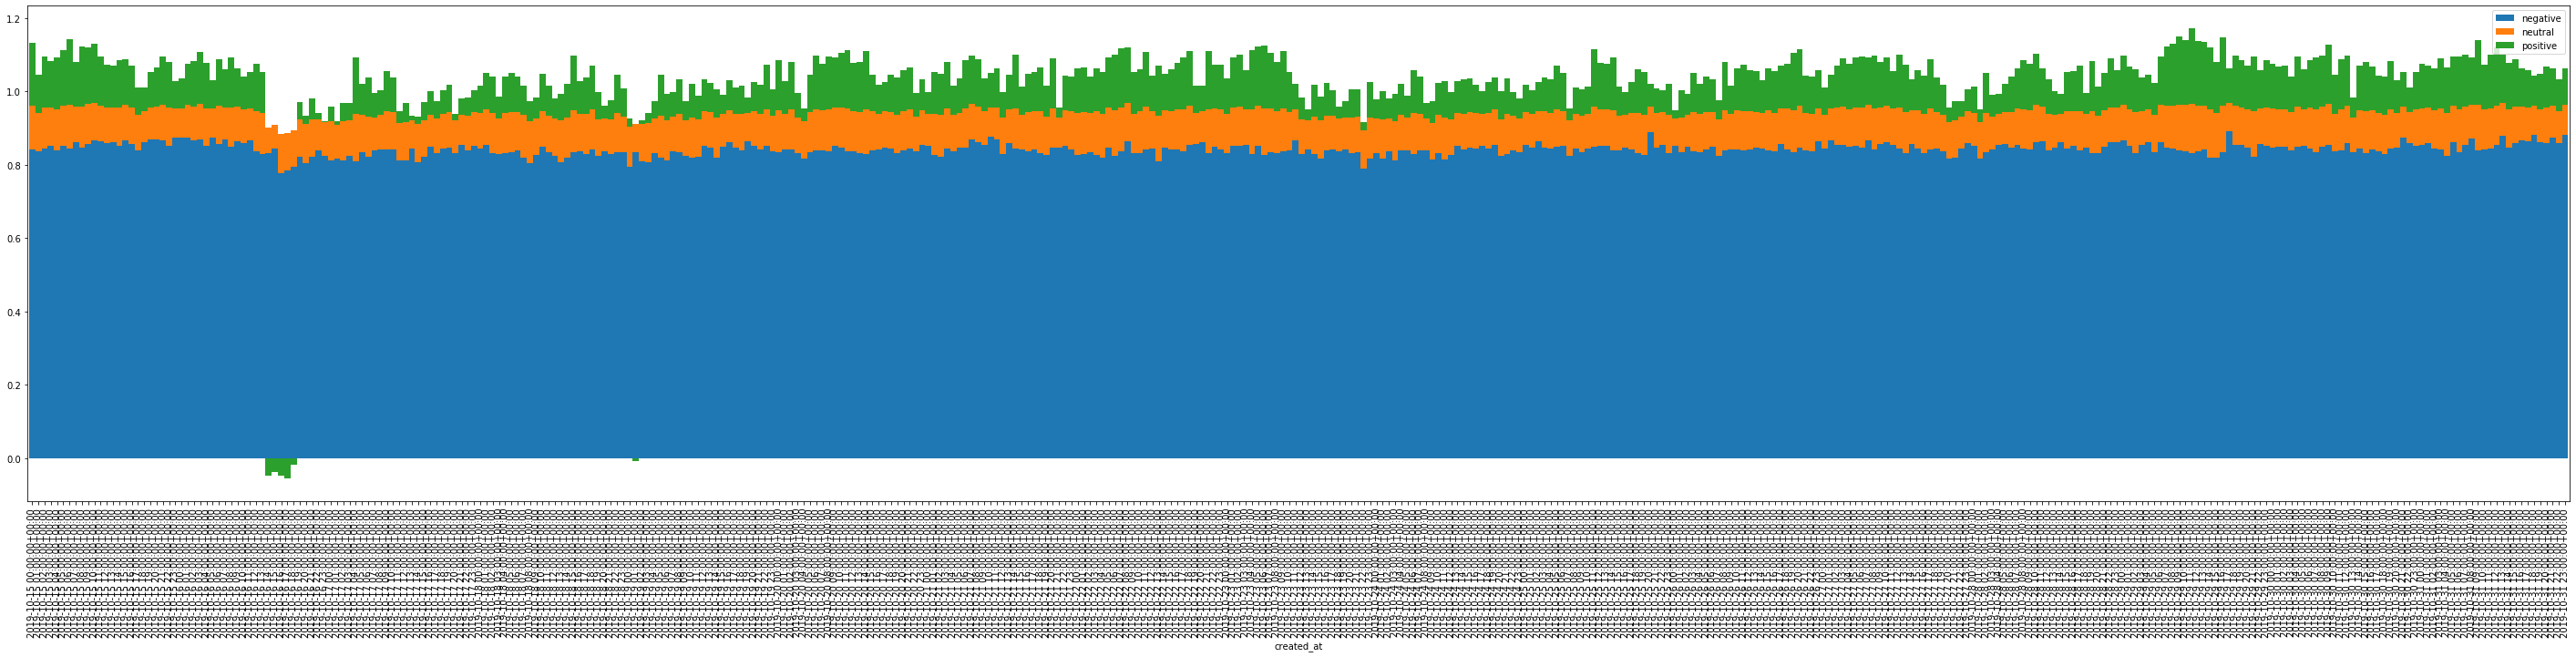

In [66]:
unique_sentiment_df[unique_sentiment_df['neutral']<.4].resample('H', on='created_at').mean().plot(figsize=(50,10), kind='bar', stacked=True, width=1.0)

In [56]:
tweet_sentiment_df[tweet_sentiment_df['neutral']<.4].resample('H', on='created_at').mean().plot(figsize=(50,10), kind='bar', stacked=True, width=1.0)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

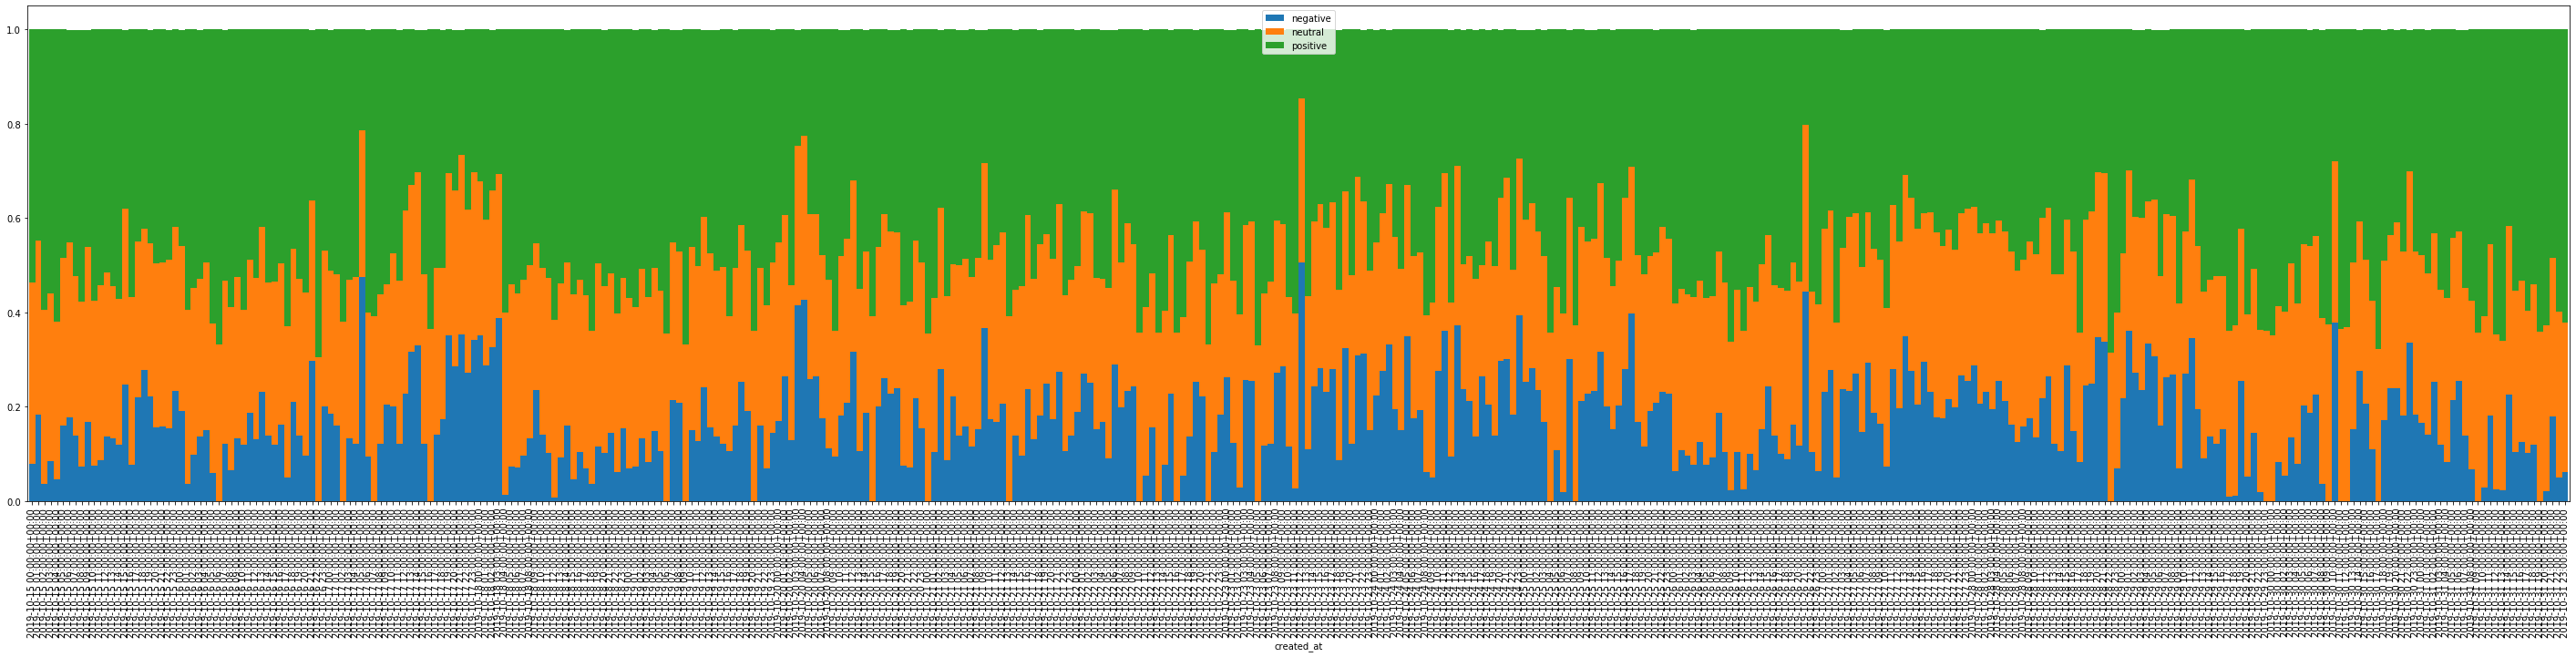

In [77]:
tweet_sentiment_df[tweet_sentiment_df['neutral']<.4].resample('H', on='created_at').mean().plot(figsize=(50,10), kind='bar', stacked=True, width=1.0)

In [70]:
dirty_hourly_btc = pathlib.Path('../../../data/dirty/crypto/Coinbase_BTCUSD_1h.csv')
BTC_price = pd.read_csv(dirty_hourly_btc,header=1)
BTC_price.head()

,2019-11-13 03-AM,BTCUSD,8733.04,8743.91,8731.64,8743.88,26.75,233692.05
0,2019-11-13 02-AM,BTCUSD,8764.90,8764.90,8726.57,8733.04,233.40,2040299.62
1,2019-11-13 01-AM,BTCUSD,8779.99,8780.00,8758.45,8764.90,106.46,933208.20
2,2019-11-13 12-AM,BTCUSD,8810.00,8838.80,8758.39,8779.99,216.42,1902443.64
3,2019-11-12 11-PM,BTCUSD,8770.74,8810.00,8760.61,8810.00,203.20,1784356.95
4,2019-11-12 10-PM,BTCUSD,8762.48,8786.76,8747.10,8770.74,178.10,1560490.62
